In [1]:
import matplotlib.pyplot as plt
import numpy as np
from strand_error_sim import StrandErrorSimulation
import csv


In [2]:
example_strand = "TTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTCCCTGACGCTGCAAAATTTGCAACCAGGCAGTCTTCGCGGTAGGTCCTAGCCTTATTGTCACTAGAGGACGCACGCTCTATTTTTATGATCCATTGATGTCCCTGACGCTGCAAAATTTGCAACCAGGCAGTCTTCGCGGTAGGTCCTAGCCTTA"
# len = 200

In [3]:
total_error_rates = {
    'd': 0.0833,
    'i': 0.0833,
    's': 0.0833,
    'ld': 0,
}

base_error_rates = {
    'A': {
        'pi': 0.01588836102870499,
        'i': 0.01621475841752588,
        's': 0.015851018954560227,
        'd': 0.011764136395383413,
        'ld': 0.003110456472280425,
    },
    'G': {
        'pi': 0.023879556701749495,
        'i': 0.018091587091377988,
        's': 0.016569317627378545,
        'd': 0.017090680978601797,
        'ld': 0.003931135429009549
    },
    'C': {
        'pi': 0.017915924372554178,
        'i': 0.01887005911546257,
        's': 0.01853747500507736,
        'd': 0.01712126643667476,
        'ld': 0.0033067584089939467
    },
    'T': {
        'pi': 0.01581873288059774,
        'i': 0.020162401335515973,
        's': 0.017022155950663705,
        'd': 0.014674738110288119,
        'ld': 0.002907934758532013,
    }
}

long_deletion_length_rates = {2: 84,
                            3: 13,
                            4: 1.8,
                            5: 0.2,
                            6: 0.02}

In [4]:
# full copy error types and locations test:

full_strand_copy_sim_f = open('full_strand_copy_simulation', 'w')
full_copy_err_type_f = open('full_copy_error_types', 'w')
full_copy_error_loc_f = open('full_copy_error_locations', 'w')

frame_f = open('frames.csv', 'w')
writer = csv.writer(frame_f)
writer.writerow(['Refs', 'Sims'])
for _ in range(1000):
    simulator = StrandErrorSimulation(total_error_rates, base_error_rates, long_deletion_length_rates,
                                example_strand)
    og_index = 0
    while simulator.index < len(simulator.strand):
        simulator.simulate_error_on_base()
        type_result_to_write = str(simulator.err_type) + '\n'
        full_copy_err_type_f.write(type_result_to_write)
        if simulator.err_type != 'n':
            location_result_to_write = str(og_index) + '\n'
            full_copy_error_loc_f.write(location_result_to_write)
        output_strand_to_write = str(simulator.strand) + '\n'
        full_strand_copy_sim_f.write(output_strand_to_write)
        simulator.index += 1
        og_index += 1

    full_strand_copy_sim_f.write(simulator.strand + '\n')
    writer.writerow([example_strand, simulator.strand])

full_copy_err_type_f.close()
full_copy_error_loc_f.close()
full_strand_copy_sim_f.close()


In [5]:
# analyze error types:

full_copy_err_type_f = open('full_copy_error_types', 'r')
hist = [['d', 0], ['ld', 0], ['s', 0], ['pi', 0], ['n', 0]]
lines = full_copy_err_type_f.readlines()
for line in lines:
    if line == 'd\n':
        hist[0][1] += 1
    if line == 'ld\n':
        hist[1][1] += 1
    if line == 's\n':
        hist[2][1] += 1
    if line == 'pi\n':
        hist[3][1] += 1
    if line == 'n\n':
        hist[4][1] += 1
full_copy_err_type_f.close()

print('d appearance rate: ' + str(hist[0][1] / (1000 * len(example_strand))))
print('ld appearance rate: ' + str(hist[1][1] / (1000 * len(example_strand))))
print('s appearance rate: ' + str(hist[2][1] / (1000 * len(example_strand))))
print('pi appearance rate: ' + str(hist[3][1] / (1000 * len(example_strand))))
print('n appearance rate: ' + str(hist[4][1] / (1000 * len(example_strand))))

d appearance rate: 0.06931
ld appearance rate: 0.014905
s appearance rate: 0.07787
pi appearance rate: 0.08288
n appearance rate: 0.73757


In [6]:

# Read file containing error locations
error_loc_f = open('full_copy_error_locations', 'r')
lines = error_loc_f.readlines()
error_loc_f.close()

hist = [int(line.rstrip()) for line in lines]


In [7]:
nums, counts = np.unique(hist, return_counts=True, axis=0)

print(nums)
print(counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
[267 237 247 268 262 235 247 263 243 243 249 227 262 235 263 228 236 241
 280 221 243 260 238 251 242 241 235 277 239 257 259 261 262 265 251 270
 226 256 221 245 261 242 226 264 235 230 

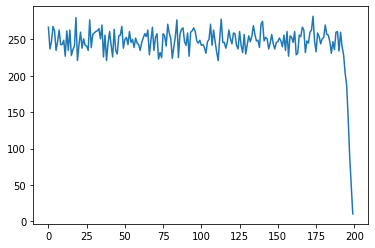

In [8]:
plt.plot(nums, counts)

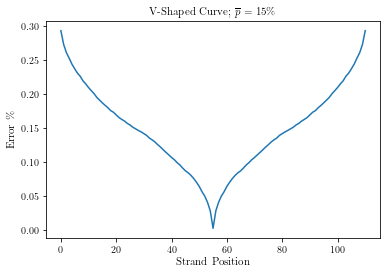

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

skew = sorted(np.random.triangular(0, 0.15, 0.3, 2000))
mid = 55

def get_pos_for_v_shape(skew, i, mid):
    return int((len(skew) - 1) * abs(i - mid) / mid)

def get_pos_for_a_shape(skew, i, mid):
    pos = -1 * int(len(skew) * abs(i - mid) / mid)
    if i == 55:
        pos = -1
    return pos

vals = [0] * 111
for i in range(0, 111):
    pos = get_pos_for_v_shape(skew, i, mid)
    vals[i] = skew[pos]

f = plt.figure()
plt.plot(range(0, 111), vals)
plt.title(r'V-Shaped Curve; $\overline{p}$ = 15\%', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'Error \%', fontsize=11)
plt.show()
f.savefig('v-shaped-curve.pdf', bbox_inches='tight')